<a href="https://colab.research.google.com/github/LEESUAJE1978/deeplearning_sejong/blob/master/ex03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#0. 텐서플로우 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

print(tf.__version__)

#예제 코드는 김성훈교수님의 모두를 위한 머신러닝과 인터넷의 예제코드를 활용하였음을 알려드립니다 .

1.15.2


1. 텐서플로우 회귀분석

1.1. 데이터 셋 생성

In [64]:
x_train=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y_train=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

1.2. 모델에 학습 데이터를 놓어 주기 위한 플레이스 홀더(Place holder 생성)

In [65]:
X = tf.placeholder(tf.float32, shape = None)
Y = tf.placeholder(tf.float32, shape=None)

1.3. 학습을 통해 구할 변수(W,b) 지정


In [66]:
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

1.4. 가설 생성

In [67]:
# Our hypothesis XW+b
hypothesis = X * W + b

1.5. 비용함수(Cost Function) MSE

In [68]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  #reduce_mean:모수로 나눠주는 작업, square : 제곱을 해주는 작업

1.6. 경사하강법(Gradient Decent) 비용함수 최적화(Cost Function Optimizer)

In [69]:
# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

1.7. 세션 실행(Session)

1.7.1 컨텍스트 매니저(Context Manager)

In [59]:
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
      cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                                  feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
      if step % 20 == 0:
        print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)
   
    print("시험성적:", sess.run(hypothesis, feed_dict= {X:[12]}))

0 Cost: 904.0 	W :  8.38 	b: 3.5244443
20 Cost: 2.690221 	W :  10.242923 	b: 3.5767343
40 Cost: 2.4427412 	W :  10.277724 	b: 3.3577528
60 Cost: 2.232824 	W :  10.309775 	b: 3.1560752
80 Cost: 2.0547738 	W :  10.339294 	b: 2.9703348
100 Cost: 1.9037484 	W :  10.366481 	b: 2.7992713
120 Cost: 1.7756548 	W :  10.39152 	b: 2.6417263
140 Cost: 1.6669996 	W :  10.414578 	b: 2.4966295
160 Cost: 1.5748415 	W :  10.435816 	b: 2.362999
180 Cost: 1.4966718 	W :  10.455375 	b: 2.2399282
200 Cost: 1.4303598 	W :  10.473389 	b: 2.1265824
220 Cost: 1.3741239 	W :  10.489979 	b: 2.0221937
240 Cost: 1.3264265 	W :  10.505258 	b: 1.9260539
260 Cost: 1.2859637 	W :  10.519329 	b: 1.8375115
280 Cost: 1.2516389 	W :  10.532289 	b: 1.7559651
300 Cost: 1.2225323 	W :  10.544225 	b: 1.6808629
320 Cost: 1.1978408 	W :  10.555218 	b: 1.6116947
340 Cost: 1.1769004 	W :  10.565341 	b: 1.5479925
360 Cost: 1.1591378 	W :  10.574666 	b: 1.4893236
380 Cost: 1.1440692 	W :  10.583252 	b: 1.4352913
400 Cost: 1.1312891

1.7.2. close() 매서드

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                              feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
  if step % 20 == 0:
    print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)


1.8. 예측(Prediction)

In [ ]:
print("시험성적:", sess.run(hypothesis, feed_dict= {X:[20]}))

H(10) 시험성적: [214.4724]


1.9.전체 코드

In [ ]:
x_train=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y_train=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

X = tf.placeholder(tf.float32, shape = None)
Y = tf.placeholder(tf.float32, shape=None)

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  #reduce_mean:모수로 나눠주는 작업, square : 제곱을 해주는 작업

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
      cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                                  feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
      if step % 20 == 0:
        print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)
   
    print("시험성적:", sess.run(hypothesis, feed_dict= {X:[3]}))

2. Keras 회귀분석

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim=1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

In [ ]:
#X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
#y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

X = [1, 2, 3]
y = [1, 2, 3]
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

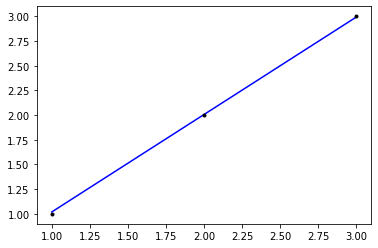

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[9.396553]]


3.파이썬 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y_train=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

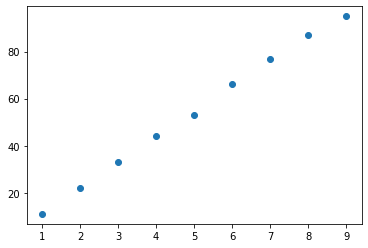

In [ ]:
plt.plot(x_train, y_train,'o')
plt.show()

In [ ]:
line_fitter = LinearRegression()
line_fitter.fit(x_train.reshape(-1,1), y_train) #X는 2차원 array 형태([[x1], [x2], ...[xn]]로 입력되어야 하기 때문에 형변환 필요 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
line_fitter.predict([[8]])

array([86.27222222])

4. 다변량 회귀분석(Multivariable Regression)


4.1 데이터 셋 생성

In [ ]:
x1_data = [75, 91, 87, 93, 74]
x2_data = [83, 89, 93, 97, 66]
x3_data = [74, 97,92, 100, 86]
y_data = [87, 95, 96, 92, 87]

4.2. 플레이스 홀더 생성

In [ ]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

4.3. 변수 생성

In [ ]:
w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
w3 = tf.Variable(tf.random_normal([1]), name = 'weight3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

4.4. 가설 수립


In [ ]:
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 +b

4.5 비용함수 

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis -Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

4.6 세션 실행

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [ ]:
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                 feed_dict = {x1: x1_data, x2 : x2_data, x3:x3_data, Y: y_data})
  if step % 10 == 0:
    print(step, 'Cost: ', cost_val, "\nPrediction: \n", hy_val)

In [ ]:
  print("시험성적:", sess.run(hypothesis, feed_dict= {x1: [88], x2: [60], x3: [94]}))

시험성적: [72.75515]


tip. 비용 함수 학습 모형(Cost function learning process)

In [72]:
X = [1,2,3]
Y = [1,2,3]
W = tf.Variable(4.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis -Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)


In [73]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(100):
  print(step, sess.run(W))
  sess.run(train)

0 4.0
1 1.1999999
2 1.0133333
3 1.000889
4 1.0000592
5 1.0000039
6 1.0000002
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
